In [ ]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.0 MB/s eta 0:00:00


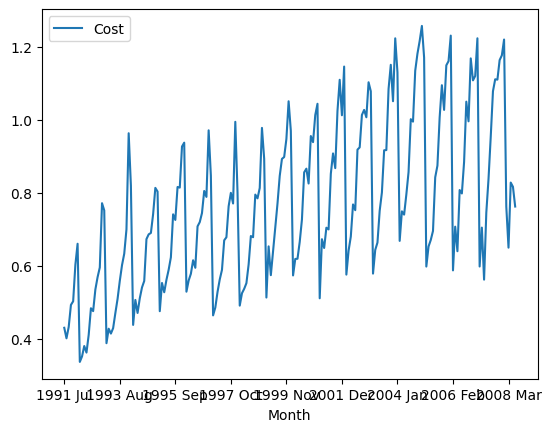

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [ ]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set 
1)Test stationary of the 
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

# Q - 1

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.696756
p-value: 0.432785
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


for 5% confidence level, p > alpha. We accept H0. We should decrease p.

# Q - 2

<Axes: xlabel='Month'>

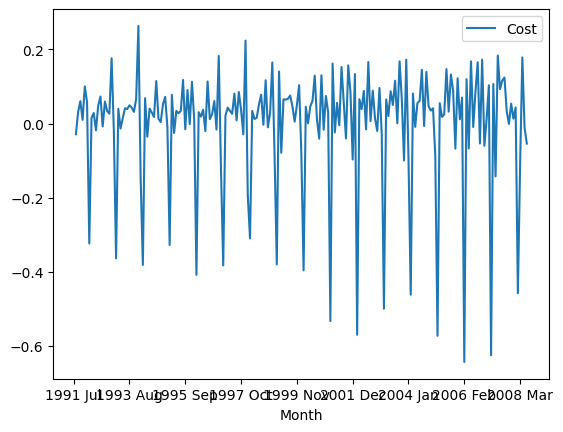

In [ ]:
dap = ap1 - ap1.shift(1)
dap.plot()

In [ ]:
dap=dap.dropna()
result = adfuller(dap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.365938
p-value: 0.012176
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


<Axes: xlabel='Month'>

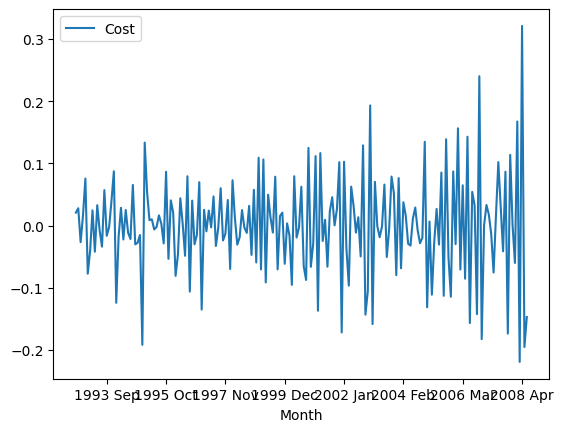

In [ ]:
dapS = dap - dap.shift(12)
dapS.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dapS=dapS.dropna()
result = adfuller(dapS['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.070403
p-value: 0.000016
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


As can be seen, now, p value is very close to 0. So, we reject H0, meaning that our data is almost stationary.

# Q - 3

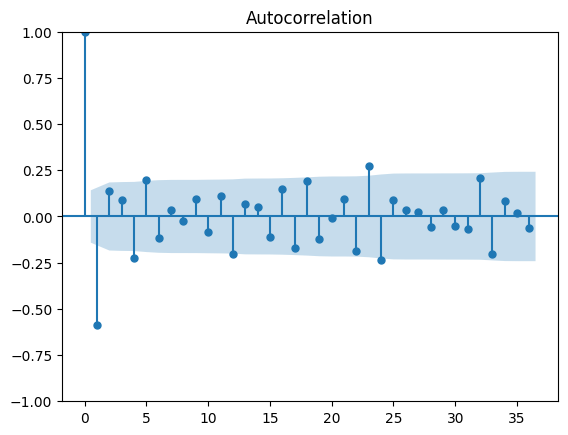

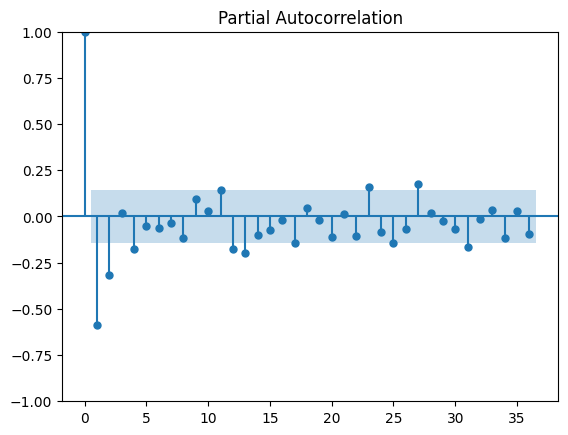

In [ ]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dapS['Cost'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dapS['Cost'], lags=36)
plt.show()


# Q - 4

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(1,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Cost   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 264.817
Date:                             Sat, 13 May 2023   AIC                           -523.634
Time:                                     17:13:14   BIC                           -513.878
Sample:                                 07-01-1991   HQIC                          -519.682
                                      - 06-01-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2800      0.074     -3.777      0.000      -0.425      -0.135
ma.L1         -0.5769      0.069     -8.321      0.000      -0.713      -0.441
sigma2         0.0036      0.000     12.859      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                18.83
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Cost'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                Cost   No. Observations:                  204
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 261.421
Date:                             Sat, 13 May 2023   AIC                           -518.842
Time:                                     17:13:32   BIC                           -512.338
Sample:                                 07-01-1991   HQIC                          -516.207
                                      - 06-01-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7402      0.051    -14.585      0.000      -0.840      -0.641
sigma2         0.0038      0.000     12.882      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   2.79   Jarque-Bera (JB):                17.46
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So, ARIMA(1,1,1) is better choise for us.

# Q - 5

In [ ]:
train=ap1[:-12]
test=ap1[-12:]
train

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2007 Feb,0.597753
2007 Mar,0.704398
2007 Apr,0.561760


# Q - 6

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


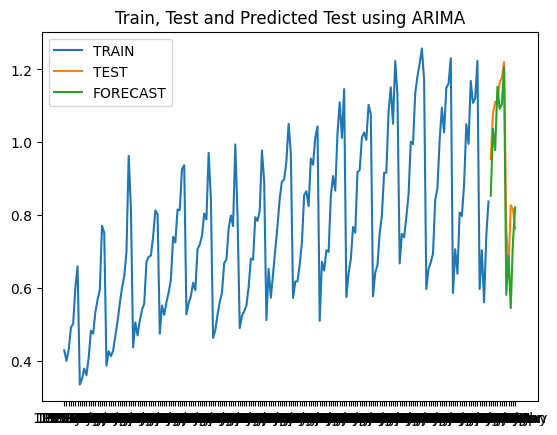

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Cost'],order=(1,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ARIMA');

In [ ]:
import numpy as np

def mae(y_hat, y_true):
    return np.mean(np.abs(y_hat - y_true))

def mape(y_hat, y_true):
    return np.mean(np.abs((y_true - y_hat) / y_true)) * 100

def mse(y_hat, y_true):
    return np.mean((y_hat - y_true)**2)

test_prediction.columns=['Forecast']
test_prediction['Cost']=test['Cost'].values
# test_prediction

y_true = test_prediction['Cost'].values
arima_preds = test_prediction['Forecast'].values

print('ARIMA MAE: %0.3f' % mae(arima_preds, y_true))
print('ARIMA MAPE: %0.3f%%' % mape(arima_preds, y_true))
print('ARIMA MSE: %0.3f' % mse(arima_preds, y_true))

ARIMA MAE: 0.093
ARIMA MAPE: 10.473%
ARIMA MSE: 0.014


# Q - 7

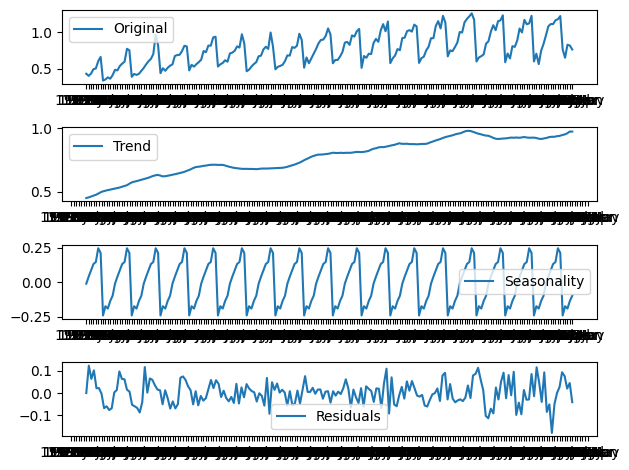

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ap1['Cost'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ap1['Cost'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

We can see that there is multiplicated trend and seasonality. 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


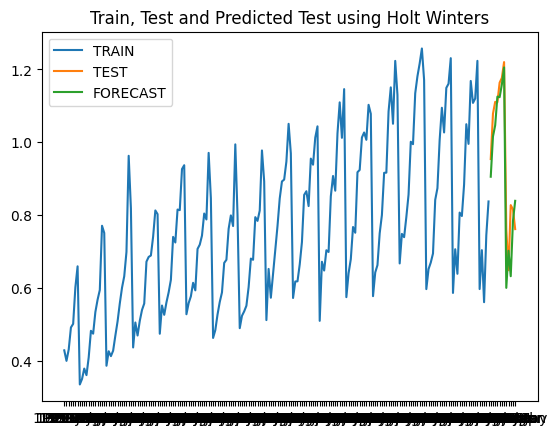

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_prediction = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.06513512310328727
Mean Squared Error = 0.007204815209575271
Mean Absolute Percentage Error = 7.595601166370273


# Q - 8

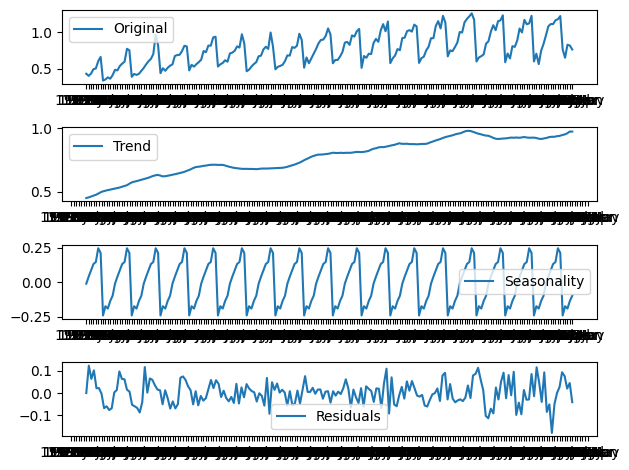

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ap1['Cost'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ap1['Cost'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

Based on graphs, we can see that we observe multiplicative seasonality, and demped and multiplicative trend. Because trend graph gets stationary after some time. Also, we observe multiplicative error terms from graph.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


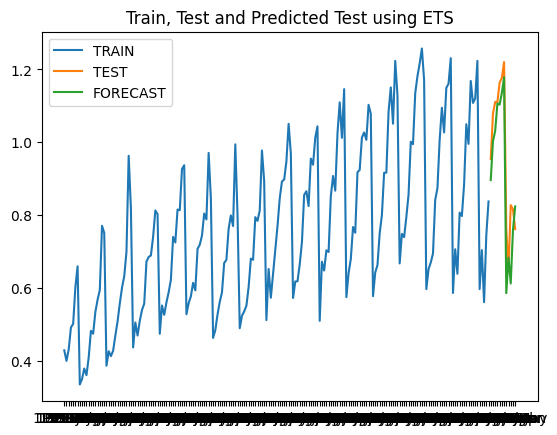

In [ ]:
import numpy as np
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_prediction=ETSModel(train['Cost'],error='mul', trend='mul',seasonal='mul',damped_trend=True, seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Passengers']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS');

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.07535474536443713
Mean Squared Error = 0.008975763384999757
Mean Absolute Percentage Error = 8.513135086364965


# Q - 9

Text(0.5, 1.0, 'Train, Test and Predicted Test using TBATS')

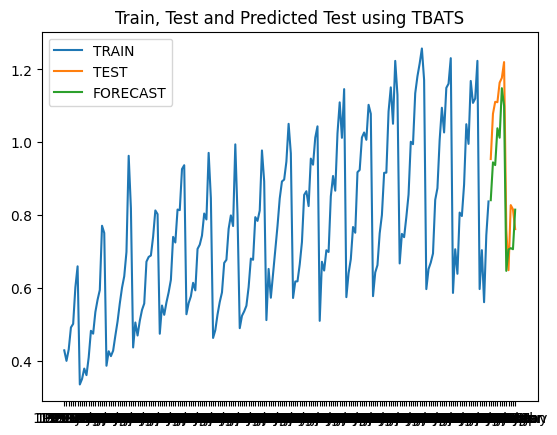

In [ ]:
from tbats import TBATS
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=False, 
    use_box_cox=False 
)
model = estimator.fit(train)
test_prediction = model.forecast(steps=12)

test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.10345093531057847
Mean Squared Error = 0.012378694197052639
Mean Absolute Percentage Error = 10.81564708544542


# Q - 10

Appearently, Holt Winters gives the lowest MAPE score (~7.59%).